Movie Industry Data Correlation project using Python

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,6)

pd.options.mode.chained_assignment = None

In [4]:
D = pd.read_csv(r"C:\Users\wind\Desktop\Dataset\movies.csv")

In [31]:
D.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
D.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [13]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [14]:
D.shape

(7668, 15)

In [15]:
D.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [17]:
# Looking for missing data
for col in D.columns:
    pct_missing = np.mean(D[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [18]:
D.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [83]:
# Oder by column
D.sort_values(by=['gross'],inplace=False,ascending=False,)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,NaN,NaN,NaN,2009,NaN,7.8,1100000.0,NaN,NaN,NaN,NaN,237000000.0,2.847246e+09,NaN,162.0
7445,NaN,NaN,NaN,2019,NaN,8.4,903000.0,NaN,NaN,NaN,NaN,356000000.0,2.797501e+09,NaN,181.0
3045,NaN,NaN,NaN,1997,NaN,7.8,1100000.0,NaN,NaN,NaN,NaN,200000000.0,2.201647e+09,NaN,194.0
6663,NaN,NaN,NaN,2015,NaN,7.8,876000.0,NaN,NaN,NaN,NaN,245000000.0,2.069522e+09,NaN,138.0
7244,NaN,NaN,NaN,2018,NaN,8.4,897000.0,NaN,NaN,NaN,NaN,321000000.0,2.048360e+09,NaN,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,NaN,NaN,NaN,2020,NaN,3.1,18.0,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,90.0
7664,NaN,NaN,NaN,2020,NaN,4.7,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
7665,NaN,NaN,NaN,2020,NaN,5.7,29.0,NaN,NaN,NaN,NaN,58750.0,NaN,NaN,NaN
7666,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,120.0


In [21]:
D.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
# correlation od data

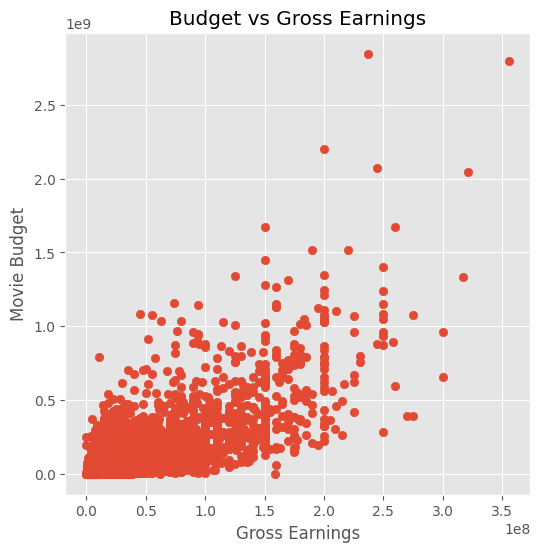

In [32]:
#Scatterplot with budget vs gross
plt.scatter(x=D['budget'],y=D['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Movie Budget')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

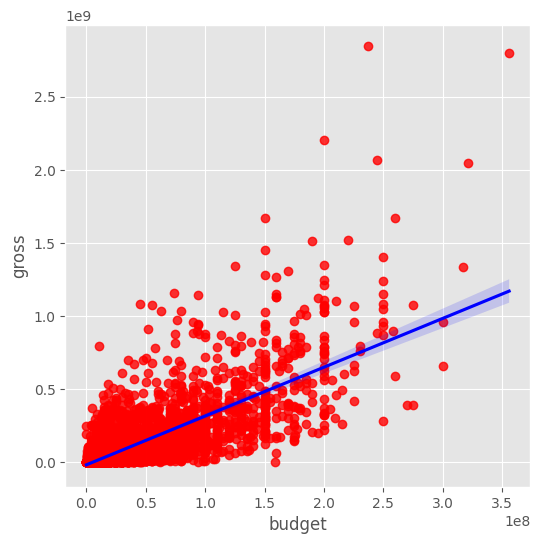

In [35]:
# Ploting Budget vs Gross using Seaborn

sns.regplot(x='budget',y='gross',data=D, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [7]:
D.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
D.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [13]:
# change of datatypes of columns

D['name'] = D['name'].astype(str)
D['genre'] = D['genre'].astype(str)
D['director'] = D['director'].astype(str)
D['writer'] = D['writer'].astype(str)
D['star'] = D['star'].astype(str)
D['country'] = D['country'].astype(str)
D['company'] = D['company'].astype(str)



In [15]:
# to identify non-numeric values in the dataframe 

non_numeric_columns = D.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')


In [32]:
# Finding correlation on specific columns

# List of specific columns you want to analyze
specific_columns = [ 'budget', 'gross', 'year', 'score','votes', 'runtime']

# Select only the specified columns
D_specific = D[specific_columns]

# Calculate the Pearson correlation coefficient
correlation_matrix = D_specific.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)


           budget     gross      year     score     votes   runtime
budget   1.000000  0.740395  0.329321  0.076254  0.442429  0.320447
gross    0.740395  1.000000  0.257486  0.186258  0.630757  0.245216
year     0.329321  0.257486  1.000000  0.097995  0.222945  0.120811
score    0.076254  0.186258  0.097995  1.000000  0.409182  0.399451
votes    0.442429  0.630757  0.222945  0.409182  1.000000  0.309212
runtime  0.320447  0.245216  0.120811  0.399451  0.309212  1.000000


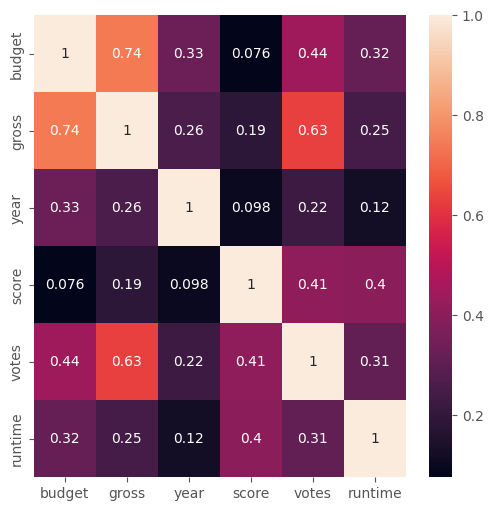

In [33]:
# List of specific columns you want to analyze
specific_columns = ['budget', 'gross', 'year', 'score','votes', 'runtime']

# Select only the specified columns
D_specific = D[specific_columns]

# Calculate the Pearson correlation coefficient
correlation_matrix = D_specific.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [37]:
# List of specific columns you want to analyze
specific_columns = ['budget', 'gross', 'year', 'score','votes', 'runtime']

# Select only the specified columns
D_specific = D[specific_columns]

# Calculate the Pearson correlation coefficient
correlation_matrix = D_specific.corr(method='pearson')

# Unstack the correlation matrix to get pairwise correlations
correlation_pairs = correlation_matrix.unstack()

# Display the pairwise correlations
print(correlation_pairs)


budget   budget     1.000000
         gross      0.740395
         year       0.329321
         score      0.076254
         votes      0.442429
         runtime    0.320447
gross    budget     0.740395
         gross      1.000000
         year       0.257486
         score      0.186258
         votes      0.630757
         runtime    0.245216
year     budget     0.329321
         gross      0.257486
         year       1.000000
         score      0.097995
         votes      0.222945
         runtime    0.120811
score    budget     0.076254
         gross      0.186258
         year       0.097995
         score      1.000000
         votes      0.409182
         runtime    0.399451
votes    budget     0.442429
         gross      0.630757
         year       0.222945
         score      0.409182
         votes      1.000000
         runtime    0.309212
runtime  budget     0.320447
         gross      0.245216
         year       0.120811
         score      0.399451
         votes

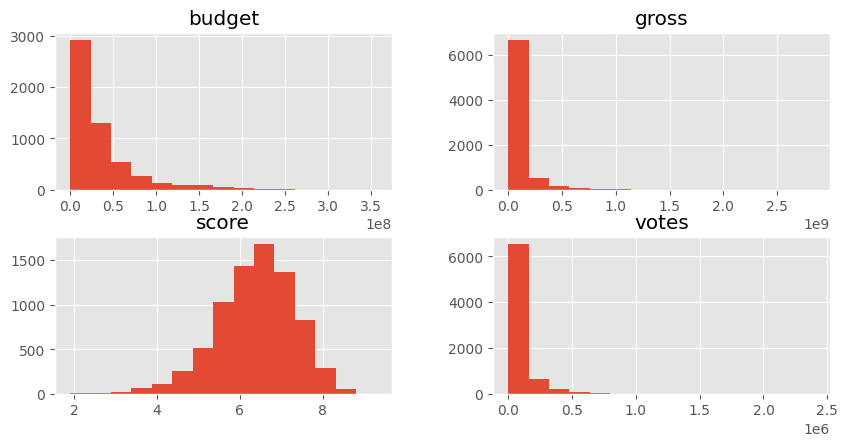

In [55]:

# Assume 'columns' is the list of columns for which you want to create histograms
columns = ['budget', 'gross', 'score','votes']

# Plot histograms for each column
D[columns].hist(bins=15, figsize=(10,10), layout=(len(columns), 2))

# Show the plots
plt.show()


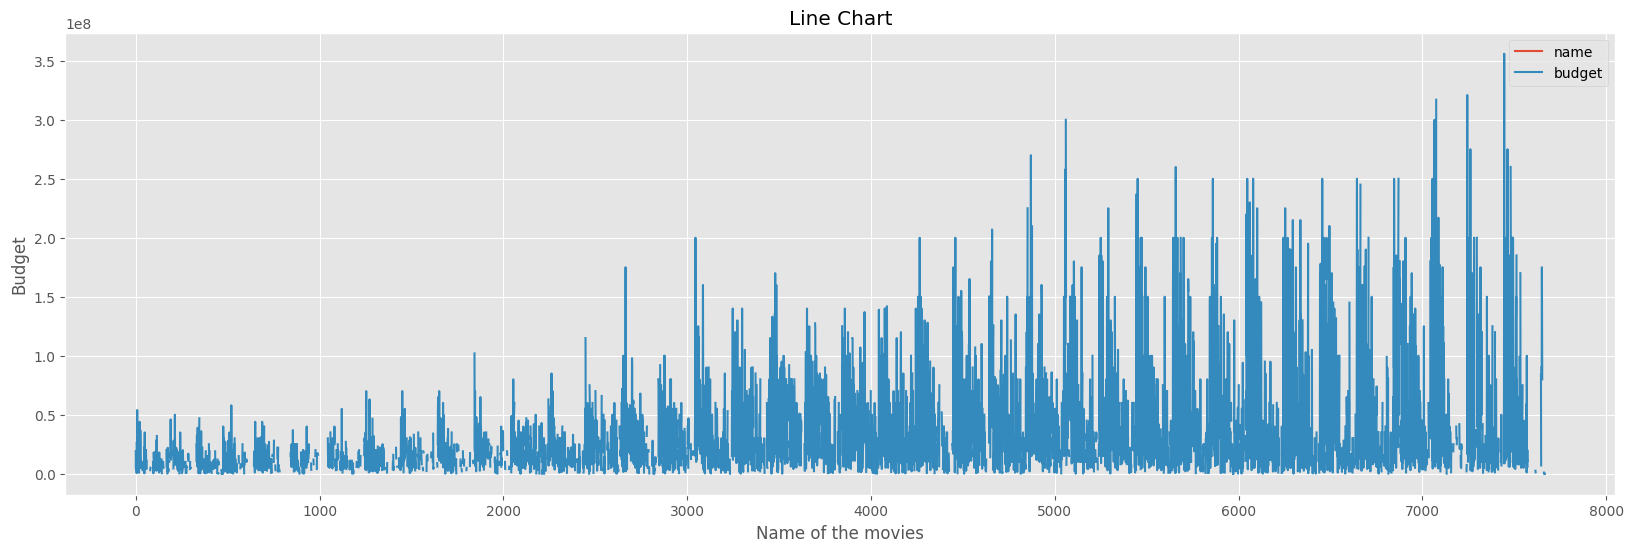

In [57]:
# line chat for movies vs gross Earnings 

# Assume 'A' is the list of columns for which you want to create a line chart
A = ['name', 'budget']

# Plot line chart for the specified columns
D[A].plot(kind='line', figsize=(20, 6))

# Add labels and title
plt.xlabel('Name of the movies')
plt.ylabel('Budget')
plt.title('Line Chart')

# Show the plot
plt.show()


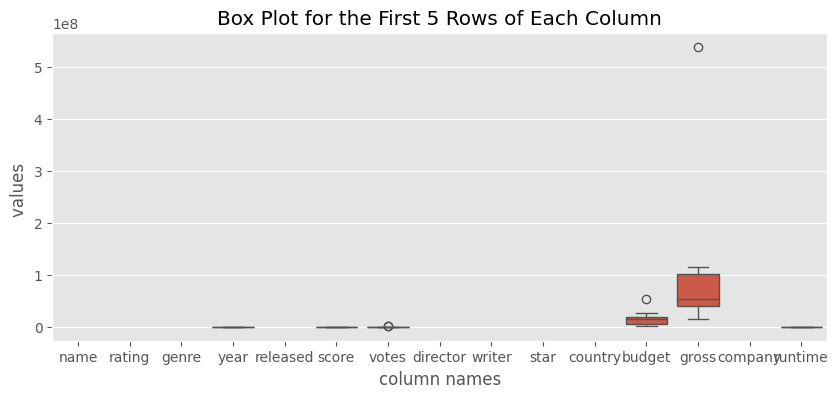

In [81]:
# Box plot for first 5 rows of the columns

# Select the first 5 rows of the DataFrame
D_first_10_rows = D.head(10)

# Melt the DataFrame to "long-form" for seaborn's boxplot
D_melted = D_first_10_rows.melt(var_name='name', value_name='0')

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='name', y='0', data=D_melted)

# Add labels and title
plt.xlabel('column names')
plt.ylabel('values ')
plt.title('Box Plot for the First 5 Rows of Each Column')

# Show the plot
plt.show()
